# creating our first GeoDataFrame from scratch

In [1]:
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

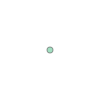

In [2]:
point = Point(0, 0)
point

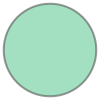

In [3]:
circle = Point(1, 1).buffer(0.5)
circle

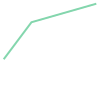

In [4]:
line = LineString([(2,2), (3.5, 4), (7, 5)])
line

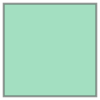

In [5]:
square = Polygon([(3, 0), (3, 1), (4, 1), (4, 0)])
square

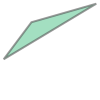

In [6]:
triangle = LineString([(2,2+ 1.5), (3.5, 4 + 1.5), (7, 5 + 1.5)]).convex_hull
triangle

### creating a geodataframe

In [7]:
geo_data = {'point': point,
            'circle': circle,
            'line': line,
            'square': square,
            'triangle': triangle}

In [8]:
geo_data.keys()

dict_keys(['point', 'circle', 'line', 'square', 'triangle'])

In [9]:
geo_data.values()

dict_values([<POINT (0 0)>, <POLYGON ((1.5 1, 1.498 0.951, 1.49 0.902, 1.478 0.855, 1.462 0.809, 1.441 0...>, <LINESTRING (2 2, 3.5 4, 7 5)>, <POLYGON ((3 0, 3 1, 4 1, 4 0, 3 0))>, <POLYGON ((2 3.5, 3.5 5.5, 7 6.5, 2 3.5))>])

In [10]:
import geopandas as gpd

In [11]:
gdf = gpd.GeoDataFrame(geo_data.items(), columns = ['geo_name', 'geometry'])
gdf

,geo_name,geometry
0,point,POINT (0 0)
1,circle,"POLYGON ((1.5 1, 1.49759 0.95099, 1.49039 0.90..."
2,line,"LINESTRING (2 2, 3.5 4, 7 5)"
3,square,"POLYGON ((3 0, 3 1, 4 1, 4 0, 3 0))"
4,triangle,"POLYGON ((2 3.5, 3.5 5.5, 7 6.5, 2 3.5))"


In [12]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

# Simple functions & computations

In [13]:
gdf['geometry_type'] = gdf['geometry'].apply(lambda x: type(x).__name__)
gdf

,geo_name,geometry,geometry_type
0,point,POINT (0 0),Point
1,circle,"POLYGON ((1.5 1, 1.49759 0.95099, 1.49039 0.90...",Polygon
2,line,"LINESTRING (2 2, 3.5 4, 7 5)",LineString
3,square,"POLYGON ((3 0, 3 1, 4 1, 4 0, 3 0))",Polygon
4,triangle,"POLYGON ((2 3.5, 3.5 5.5, 7 6.5, 2 3.5))",Polygon


In [15]:
gdf['geometry_buffered'] = gdf['geometry'].apply(lambda x: x.buffer(0.5))
gdf

,geo_name,geometry,geometry_type,geometry_buffered
0,point,POINT (0 0),Point,"POLYGON ((0.5 0, 0.49759 -0.04901, 0.49039 -0...."
1,circle,"POLYGON ((1.5 1, 1.49759 0.95099, 1.49039 0.90...",Polygon,"POLYGON ((1.9994 1.02453, 1.9994 0.97547, 1.99..."
2,line,"LINESTRING (2 2, 3.5 4, 7 5)",LineString,"POLYGON ((3.1 4.3, 3.12949 4.33574, 3.16217 4...."
3,square,"POLYGON ((3 0, 3 1, 4 1, 4 0, 3 0))",Polygon,"POLYGON ((3 -0.5, 2.95099 -0.49759, 2.90245 -0..."
4,triangle,"POLYGON ((2 3.5, 3.5 5.5, 7 6.5, 2 3.5))",Polygon,"POLYGON ((2.25725 3.07125, 2.21389 3.04806, 2...."


In [16]:
gdf['geometry_length'] = [g.length for g in gdf['geometry'].to_list()]
gdf['geometry_area'] = [g.area for g in gdf['geometry'].to_list()]

gdf

,geo_name,geometry,geometry_type,geometry_buffered,geometry_length,geometry_area
0,point,POINT (0 0),Point,"POLYGON ((0.5 0, 0.49759 -0.04901, 0.49039 -0....",0.000000,0.000000
1,circle,"POLYGON ((1.5 1, 1.49759 0.95099, 1.49039 0.90...",Polygon,"POLYGON ((1.9994 1.02453, 1.9994 0.97547, 1.99...",3.140331,0.784137
2,line,"LINESTRING (2 2, 3.5 4, 7 5)",LineString,"POLYGON ((3.1 4.3, 3.12949 4.33574, 3.16217 4....",6.140055,0.000000
3,square,"POLYGON ((3 0, 3 1, 4 1, 4 0, 3 0))",Polygon,"POLYGON ((3 -0.5, 2.95099 -0.49759, 2.90245 -0...",4.000000,1.000000
4,triangle,"POLYGON ((2 3.5, 3.5 5.5, 7 6.5, 2 3.5))",Polygon,"POLYGON ((2.25725 3.07125, 2.21389 3.04806, 2....",11.971007,2.750000


# visaulising synthetic data with GeoPandas

In [17]:
import geopandas as gpd

In [18]:
gdf

,geo_name,geometry,geometry_type,geometry_buffered,geometry_length,geometry_area
0,point,POINT (0 0),Point,"POLYGON ((0.5 0, 0.49759 -0.04901, 0.49039 -0....",0.000000,0.000000
1,circle,"POLYGON ((1.5 1, 1.49759 0.95099, 1.49039 0.90...",Polygon,"POLYGON ((1.9994 1.02453, 1.9994 0.97547, 1.99...",3.140331,0.784137
2,line,"LINESTRING (2 2, 3.5 4, 7 5)",LineString,"POLYGON ((3.1 4.3, 3.12949 4.33574, 3.16217 4....",6.140055,0.000000
3,square,"POLYGON ((3 0, 3 1, 4 1, 4 0, 3 0))",Polygon,"POLYGON ((3 -0.5, 2.95099 -0.49759, 2.90245 -0...",4.000000,1.000000
4,triangle,"POLYGON ((2 3.5, 3.5 5.5, 7 6.5, 2 3.5))",Polygon,"POLYGON ((2.25725 3.07125, 2.21389 3.04806, 2....",11.971007,2.750000


<Axes: >

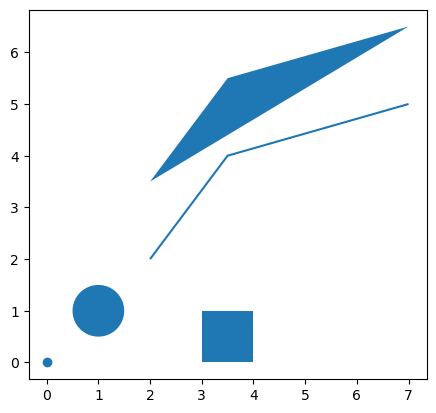

In [19]:
gdf.plot()

In [20]:
import matplotlib.pyplot as plt

<Axes: >

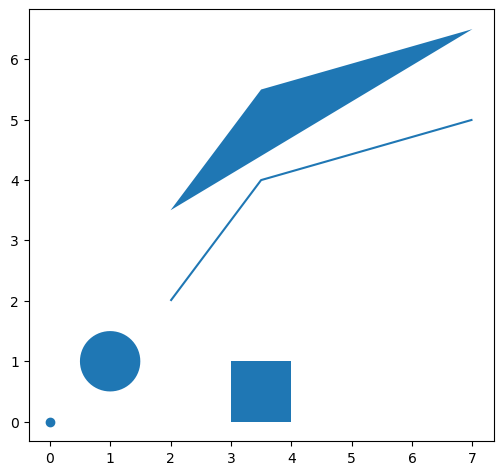

In [34]:
f, ax = plt.subplots(1, 1, figsize = (6, 6))
gdf.plot(ax = ax)

<Axes: >

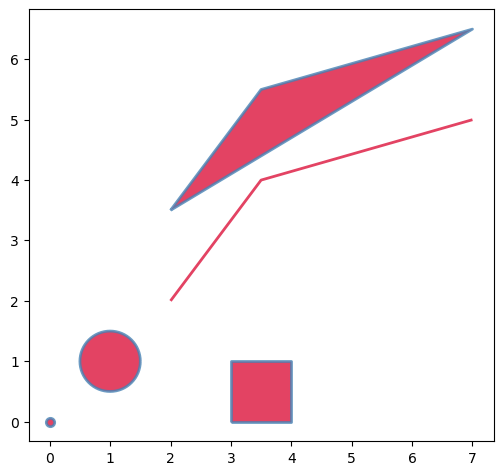

In [35]:
f, ax = plt.subplots(1, 1, figsize = (6, 6))
gdf.plot(ax = ax,
         color = 'crimson',
         edgecolor = 'steelblue',
         linewidth = 2,
         alpha = 0.8)

<Axes: >

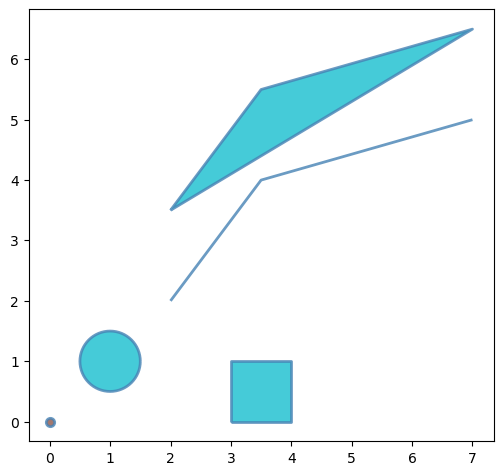

In [36]:
f, ax = plt.subplots(1, 1, figsize = (6, 6))
gdf.plot(ax = ax,
         column = 'geometry_type',
         edgecolor = 'steelblue',
         linewidth = 2,
         alpha = 0.8)

<Axes: >

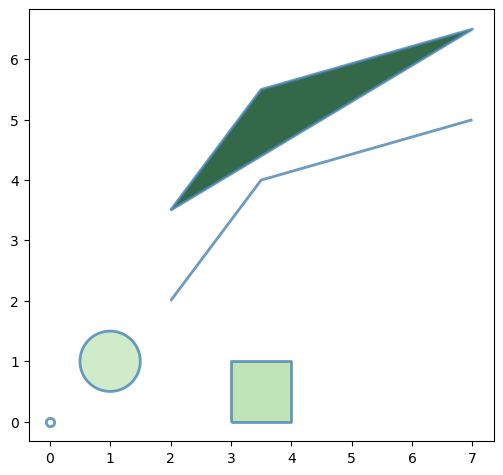

In [44]:
f, ax = plt.subplots(1, 1, figsize = (6, 6))
gdf.plot(ax = ax,
         column = 'geometry_length',
         cmap = 'Greens',
         edgecolor = 'steelblue',
         linewidth = 2,
         alpha = 0.8)